In [58]:
import sklearn
import numpy
import pandas
import scipy
import re
import string
import datetime
from datetime import date

In [59]:
import matplotlib as plt
import matplotlib.pyplot as plt

In [60]:
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer


from sklearn.model_selection import cross_val_predict, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances,roc_auc_score

from sklearn import svm, linear_model
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle
from sklearn.metrics import classification_report
from sklearn import  feature_selection
from sklearn.feature_selection import (chi2, f_classif, mutual_info_classif, SelectPercentile, SelectKBest, SelectFpr, SelectFdr, SelectFwe,SelectFromModel, GenericUnivariateSelect)


In [61]:
pandas.options.mode.chained_assignment = None

In [62]:
file=open('./jbap6.csv')
data=pandas.read_csv(file)

In [63]:
data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Resolution,Components,Labels,...,IntegrMess_lab,Web_lab,Server_lab,Security_lab,Testsuite_lab,LoadBalance_lab,Hornet_lab,Maven_lab,Servnet_lab,Other_lab
0,5055,0,JBPAPP6-1762,@Resource injection of Datasource on clustered...,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,Clustering,NaN,...,0,0,0,0,0,0,0,0,0,0
1,5056,1,JBPAPP6-1774,jconsole.bat fails if trying to connect to a s...,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,Scripts and Commands,NaN,...,0,0,0,0,0,0,0,0,0,0
2,5057,2,JBPAPP6-1534,Need to document how to deploy files via the H...,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,Documentation,NaN,...,0,0,0,0,0,0,0,0,0,0
3,5058,3,JBPAPP6-1290,CacheException: Unable to end batch,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,Clustering,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5059,4,JBPAPP6-1320,EJBCLIENT000028: No EJB receiver contexts avai...,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,Clustering EJB,NaN,...,0,0,0,0,0,0,0,0,0,0
5,5060,5,JBPAPP6-1403,Inconsistent way of logging messages.,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,?,eap601candidate,...,0,0,0,0,0,0,0,0,0,1
6,5061,6,JBPAPP6-1428,cli help --commands doesn't list commands,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,?,NaN,...,0,0,0,0,0,0,0,0,0,1
7,5062,7,JBPAPP6-1525,ClientSessionFactoryImpl.forceReturnChannel1 t...,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,HornetQ,NaN,...,0,0,0,0,0,0,1,0,0,0
8,5063,8,JBPAPP6-1508,Picketlink does not recognize JBoss EAP 6.0,Closed,JBoss Enterprise Application Platform 6,Major,Migrated to another ITS,PicketLink,NaN,...,0,0,0,1,0,0,0,0,0,0
9,5064,9,JBPAPP6-1526,"Can't load log handler ""java.util.logging.File...",Closed,JBoss Enterprise Application Platform 6,Minor,Migrated to another ITS,HornetQ,NaN,...,0,0,0,0,0,0,1,0,0,0


ttr
Минимум: 0  Максимум: 609  Среднее: 112.28236397748593
Attachments
Минимум: 0  Максимум: 17  Среднее: 0.2804878048780488
Comments
Минимум: 1  Максимум: 126  Среднее: 7.279549718574109


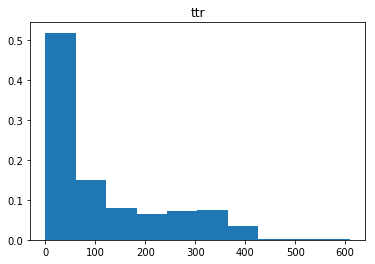

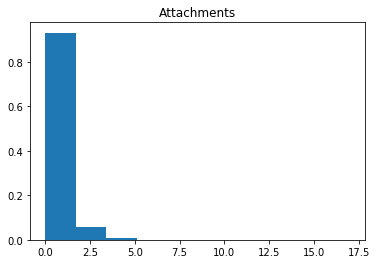

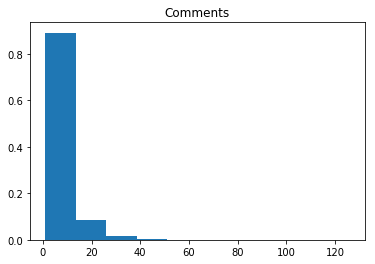

In [64]:

def infa(data, field):
    print (field)    
    print ('Минимум: ' + str(data[field].min())+ '  Максимум: ' + str(data[field].max())+'  Среднее: ' + str(data[field].mean()))
        
    plt.figure()
    btt=numpy.array(data[field])
    hist_rf=plt.hist(btt, weights=numpy.zeros_like(btt) + 1. / btt.size, bins=10)
    plt.title(field) 
    
    return

infa(data, 'ttr')
infa(data, 'Attachments')
infa(data, 'Comments')

Resolution
Cannot Reproduce             5
Deferred                     4
Done                       686
Duplicate Issue             13
Migrated to another ITS    290
Out of Date                  7
Partially Completed          2
Rejected                    29
Won't Fix                   30
Name: Issue_key, dtype: int64


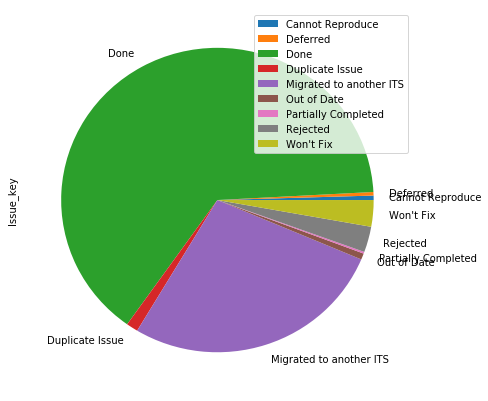

In [65]:
print(data.groupby(['Resolution'])['Issue_key'].count())
plot = data.groupby(['Resolution'])['Issue_key'].count().plot.pie(y='Status', figsize=(7, 7),  legend=True)

Priority
Blocker      72
Critical     73
Major       826
Minor        91
Optional      2
Trivial       2
Name: Issue_key, dtype: int64


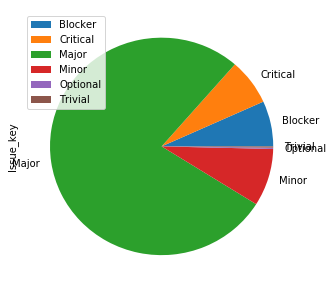

In [66]:
print(data.groupby(['Priority'])['Issue_key'].count())
plot = data.groupby(['Priority'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

was_reopened
0.0    658
1.0    408
Name: Issue_key, dtype: int64


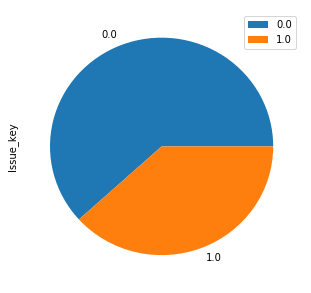

In [67]:
print(data.groupby(['was_reopened'])['Issue_key'].count())
plot = data.groupby(['was_reopened'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

In [68]:
AOT=['Builds', 'Docs', 'Clustering', 'Config', 'EJB', 'Hibernate', 'IntegrMess', 'Web', 'Server', 'Security','Testsuite', 'Hornet', 'Maven' , 'Servnet', 'Other']

<BarContainer object of 15 artists>

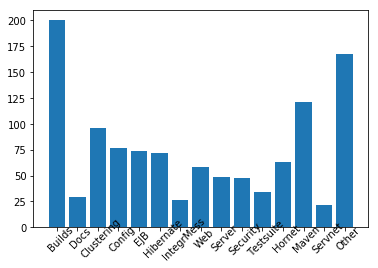

In [76]:
an={}
for i in range(len(AOT)):
    an.update({AOT[i]:data[AOT[i]+'_lab'].sum()}) 
plt.figure()
plt.xticks(range(len(an)), an.keys(),rotation=45, rotation_mode='anchor')    
plt.bar(range(len(an)), an.values(), align='center')

In [70]:
bin_data=data

bin_data=pandas.get_dummies(bin_data, prefix=['Resolution'], columns=['Resolution'])

bin_data['Priority_ord']=bin_data['Priority'].astype("category", ordered=True,categories=['Optional', 'Trivial', 'Minor', 'Major', 'Critical', 'Blocker']).cat.codes

bin_data['norm_ttr']=preprocessing.scale(bin_data['ttr'])
bin_data['norm_att']=preprocessing.scale(bin_data['Attachments'])
bin_data['norm_comm']=preprocessing.scale(bin_data['Comments'])

bin_data['Resolution_Wont Fix_new']=bin_data["Resolution_Won't Fix"]+bin_data['Resolution_Cannot Reproduce']
bin_data['Resolution_Migrated_new']=bin_data['Resolution_Migrated to another ITS']+bin_data['Resolution_Out of Date']+bin_data['Resolution_Deferred']+bin_data['Resolution_Partially Completed']

/Users/annagromova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """
/Users/annagromova/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [71]:
bin_data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Components,Labels,Description,...,Resolution_Out of Date,Resolution_Partially Completed,Resolution_Rejected,Resolution_Won't Fix,Priority_ord,norm_ttr,norm_att,norm_comm,Resolution_Wont Fix_new,Resolution_Migrated_new
0,5055,0,JBPAPP6-1762,@Resource injection of Datasource on clustered...,Closed,JBoss Enterprise Application Platform 6,Major,Clustering,NaN,A clustered SFSB with a Datasource @Resource ...,...,0,0,0,0,3,-0.763428,-0.303058,0.874118,0,1
1,5056,1,JBPAPP6-1774,jconsole.bat fails if trying to connect to a s...,Closed,JBoss Enterprise Application Platform 6,Major,Scripts and Commands,NaN,If trying to connect to a standalone EAP 6.0....,...,0,0,0,0,3,-0.779622,-0.303058,2.044732,0,1
2,5057,2,JBPAPP6-1534,Need to document how to deploy files via the H...,Closed,JBoss Enterprise Application Platform 6,Major,Documentation,NaN,"The deployment documentation <span class=""err...",...,0,0,0,0,3,1.609066,-0.303058,-0.816770,0,1
3,5058,3,JBPAPP6-1290,CacheException: Unable to end batch,Closed,JBoss Enterprise Application Platform 6,Major,Clustering,NaN,"<p/>\n<div id=""syntaxplugin"" class=""syntaxplug...",...,0,0,0,0,3,-0.253301,-0.303058,-0.166429,0,1
4,5059,4,JBPAPP6-1320,EJBCLIENT000028: No EJB receiver contexts avai...,Closed,JBoss Enterprise Application Platform 6,Major,Clustering EJB,NaN,"after network restoration, we saw client gett...",...,0,0,0,0,3,-0.010384,-0.303058,-0.296497,0,1
5,5060,5,JBPAPP6-1403,Inconsistent way of logging messages.,Closed,JBoss Enterprise Application Platform 6,Major,?,eap601candidate,Subsystems use various ways of logging messag...,...,0,0,0,0,3,1.196107,-0.303058,-0.166429,0,1
6,5061,6,JBPAPP6-1428,cli help --commands doesn't list commands,Closed,JBoss Enterprise Application Platform 6,Major,?,NaN,"This is a regression introduced by <a href=""h...",...,0,0,0,0,3,0.353993,-0.303058,-0.816770,0,1
7,5062,7,JBPAPP6-1525,ClientSessionFactoryImpl.forceReturnChannel1 t...,Closed,JBoss Enterprise Application Platform 6,Major,HornetQ,NaN,There is npe in NettySymmetricClusterWithDisc...,...,0,0,0,0,3,1.787206,-0.303058,-0.296497,0,1
8,5063,8,JBPAPP6-1508,Picketlink does not recognize JBoss EAP 6.0,Closed,JBoss Enterprise Application Platform 6,Major,PicketLink,NaN,ServerDetector#isJboss() always returns false...,...,0,0,0,0,3,1.026064,-0.303058,0.093708,0,1
9,5064,9,JBPAPP6-1526,"Can't load log handler ""java.util.logging.File...",Closed,JBoss Enterprise Application Platform 6,Minor,HornetQ,NaN,"These tests fail in hudson job<span class=""er...",...,0,0,0,0,2,1.762914,-0.303058,0.223776,0,1


In [72]:
clust_data=bin_data[['Builds_lab',
 'Docs_lab',
 'Clustering_lab',
 'Config_lab',
 'EJB_lab',
 'Hibernate_lab',
 'IntegrMess_lab',
 'Web_lab',
 'Server_lab',
 'Security_lab',
 'Testsuite_lab',
 'Hornet_lab',
 'Maven_lab',
 'Servnet_lab',
 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Migrated_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]


In [11]:
clust_data

,Builds_lab,Docs_lab,Clustering_lab,Config_lab,EJB_lab,Hibernate_lab,IntegrMess_lab,Web_lab,Server_lab,Security_lab,...,was_reopened,Resolution_Done,Resolution_Duplicate Issue,Resolution_Migrated_new,Resolution_Rejected,Resolution_Wont Fix_new,Priority_ord,norm_ttr,norm_att,norm_comm
0,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,-0.763428,-0.303058,0.874118
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,-0.779622,-0.303058,2.044732
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,1.609066,-0.303058,-0.816770
3,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,-0.253301,-0.303058,-0.166429
4,0,0,1,0,1,0,0,0,0,0,...,0.0,0,0,1,0,0,3,-0.010384,-0.303058,-0.296497
5,0,0,0,0,0,0,0,0,0,0,...,1.0,0,0,1,0,0,3,1.196107,-0.303058,-0.166429
6,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,0.353993,-0.303058,-0.816770
7,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,3,1.787206,-0.303058,-0.296497
8,0,0,0,0,0,0,0,0,0,1,...,0.0,0,0,1,0,0,3,1.026064,-0.303058,0.093708
9,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,1,0,0,2,1.762914,-0.303058,0.223776


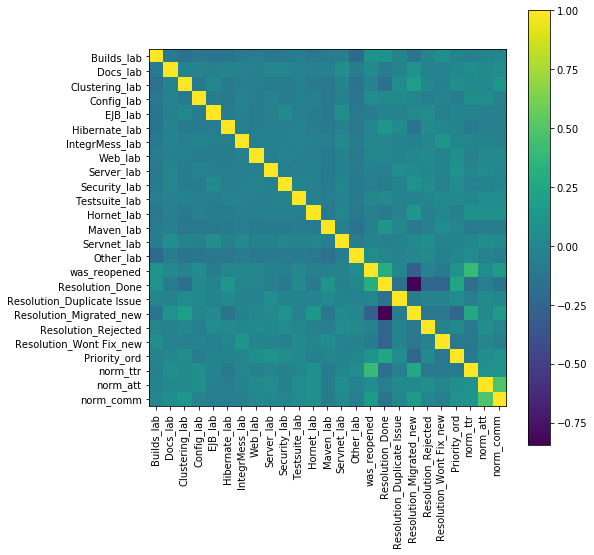

In [73]:
from matplotlib.colors import LinearSegmentedColormap
def corr_heatmap(data):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    corr_ = data.corr(method='pearson')
    ax.set_xticks(numpy.arange(len(list(data))))
    ax.set_yticks(numpy.arange(len(list(data))))
    ax.set_xticklabels(list(data),rotation=90)
    ax.set_yticklabels(list(data))
    im = ax.imshow(corr_)
    plt.colorbar(im)
    return plt.show()


corr_heatmap(clust_data)


<function matplotlib.pyplot.bar(*args, **kwargs)>

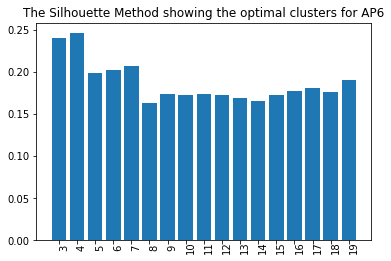

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

def silh_index(data, title):
    silh_ind={}
    for i in range(3,20):
        kmeans=KMeans(n_clusters=i, random_state=42)
        labi=kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data,labi)
        silh_ind.update({i:silhouette_avg})
    plt.figure()
    plt.xticks(range(len(silh_ind)), silh_ind.keys(),rotation=90, rotation_mode='anchor')    
    plt.bar(range(len(silh_ind)), silh_ind.values(), align='center')
    plt.title(title)
    return plt.bar

silh_index(clust_data, 'The Silhouette Method showing the optimal clusters for AP6')


In [15]:
def km_clustering(n,data): 
    headers=list(data)
    zz={}
    km = KMeans(n_clusters=n, random_state=42).fit(data)
    data['cluster_km'] = km.labels_
    zentr=numpy.round(km.cluster_centers_, 3)    

    for i in range(n):
        zrow=zentr[i,:]
        zi=dict(zip(headers, zrow))
        zz.update({i:zi})             
    print(zz) 
    return data

data_km=clust_data[['Builds_lab', 'Docs_lab', 'Clustering_lab', 'Config_lab', 'EJB_lab', 'Hibernate_lab', 'IntegrMess_lab', 'Web_lab', 'Server_lab', 'Security_lab', 'Testsuite_lab', 'Hornet_lab', 'Maven_lab', 'Servnet_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Migrated_new','Resolution_Rejected', 'Resolution_Wont Fix_new', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

d_km=km_clustering(4,data_km)
print (d_km.groupby(['cluster_km']).size())


{0: {'IntegrMess_lab': 0.024, 'EJB_lab': 0.075, 'Clustering_lab': 0.079, 'Web_lab': 0.055, 'norm_ttr': -0.572, 'Security_lab': 0.049, 'Servnet_lab': 0.016, 'Maven_lab': 0.133, 'Docs_lab': 0.014, 'Resolution_Migrated_new': 0.213, 'Hornet_lab': 0.044, 'Builds_lab': 0.205, 'was_reopened': 0.261, 'Other_lab': 0.155, 'Hibernate_lab': 0.081, 'Resolution_Done': 0.692, 'Resolution_Duplicate Issue': 0.014, 'norm_comm': -0.173, 'Server_lab': 0.048, 'Resolution_Rejected': 0.035, 'Priority_ord': 3.13, 'norm_att': -0.222, 'Testsuite_lab': 0.03, 'Config_lab': 0.061, 'Resolution_Wont Fix_new': 0.045}, 1: {'IntegrMess_lab': 0.026, 'EJB_lab': 0.071, 'Clustering_lab': 0.102, 'Web_lab': 0.041, 'norm_ttr': 1.428, 'Security_lab': 0.034, 'Servnet_lab': 0.026, 'Maven_lab': 0.09, 'Docs_lab': 0.053, 'Resolution_Migrated_new': 0.44, 'Hornet_lab': 0.083, 'Builds_lab': 0.154, 'was_reopened': 0.658, 'Other_lab': 0.177, 'Hibernate_lab': 0.045, 'Resolution_Done': 0.553, 'Resolution_Duplicate Issue': -0.0, 'norm_comm

In [23]:
print(d_km.groupby(['cluster_km','Priority_ord']).size())

cluster_km  Priority_ord
0           0                 1
            1                 1
            2                50
            3               564
            4                43
            5                52
1           3                 2
            4                 1
2           1                 1
            2                38
            3               199
            4                17
            5                11
3           0                 1
            2                 3
            3                61
            4                12
            5                 9
dtype: int64


<module 'matplotlib.pyplot' from '/Users/annagromova/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

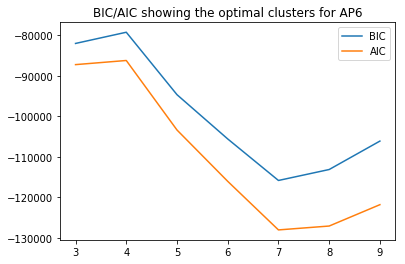

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM

def AIC_BIC(data,title):
    plt.figure()
    n_components = numpy.arange(3, 10)    
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data)
              for n in n_components]
    plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
    plt.legend() 
    plt.title(title)
    return plt

AIC_BIC(clust_data,'BIC/AIC showing the optimal clusters for AP6')

In [24]:
def em_clust(data,n):
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(data)
    data['cluster_em'] = gmm.predict(data)
    for i in range (n):
        temp=data[data['cluster_em']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())

    return 


clust_data_gmm=clust_data[['Builds_lab', 'Docs_lab', 'Clustering_lab', 'Config_lab', 'EJB_lab', 'Hibernate_lab', 'IntegrMess_lab', 'Web_lab', 'Server_lab', 'Security_lab', 'Testsuite_lab', 'Hornet_lab', 'Maven_lab', 'Servnet_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Migrated_new','Resolution_Rejected', 'Resolution_Wont Fix_new', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

em_clust(clust_data_gmm,7)

Cluster # 0, count: 87
Builds_lab                    0.114943
Docs_lab                      0.000000
Clustering_lab                0.000000
Config_lab                    0.011494
EJB_lab                       0.000000
Hibernate_lab                 0.448276
IntegrMess_lab                0.034483
Web_lab                       0.218391
Server_lab                    0.000000
Security_lab                  0.000000
Testsuite_lab                 0.000000
Hornet_lab                    0.022989
Maven_lab                     0.068966
Servnet_lab                   0.000000
Other_lab                     0.080460
was_reopened                  0.000000
Resolution_Done               0.609195
Resolution_Duplicate Issue    0.000000
Resolution_Migrated_new       0.000000
Resolution_Rejected           0.114943
Resolution_Wont Fix_new       0.275862
Priority_ord                  2.965517
norm_ttr                     -0.784648
norm_att                     -0.240962
norm_comm                    -0.434041
cl

In [23]:
print(clust_data_gmm.groupby(['cluster_em','Priority_ord']).size())
for i in range(len(AOT)):
    print(clust_data_gmm.groupby(['cluster_em',AOT[i]+'_lab']).size())

cluster_em  Priority_ord
0           0                 1
            2                 8
            3                73
            4                 2
            5                 3
1           2                 1
            3                20
            4                 1
2           0                 1
            3                20
            4                 5
            5                 1
3           1                 1
            2                13
            3                95
            4                 1
4           1                 1
            2                60
            3               475
            4                38
            5                31
5           2                 6
            3               102
            4                16
            5                22
6           2                 3
            3                41
            4                10
            5                15
dtype: int64
cluster_em  Builds_lab
0          

In [66]:
print(clust_data_gmm[(clust_data_gmm['Resolution_Out of Date_new']==1)&(clust_data_gmm['cluster_em']==3)]['norm_ttr'].mean())



1.935381640920369


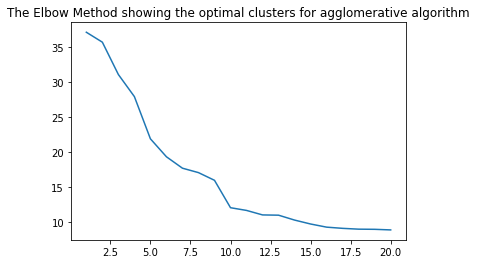

In [59]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def elbow(data):
    plt.figure()
    Z = linkage(data, 'ward')
    last = Z[-20:, 2]
    last_rev = last[::-1] #по убыванию
    idxs = numpy.arange(1, len(last) + 1)
    plt.plot(idxs, last_rev)
    plt.title('The Elbow Method showing the optimal clusters for agglomerative algorithm')
    return

elbow(clust_data)

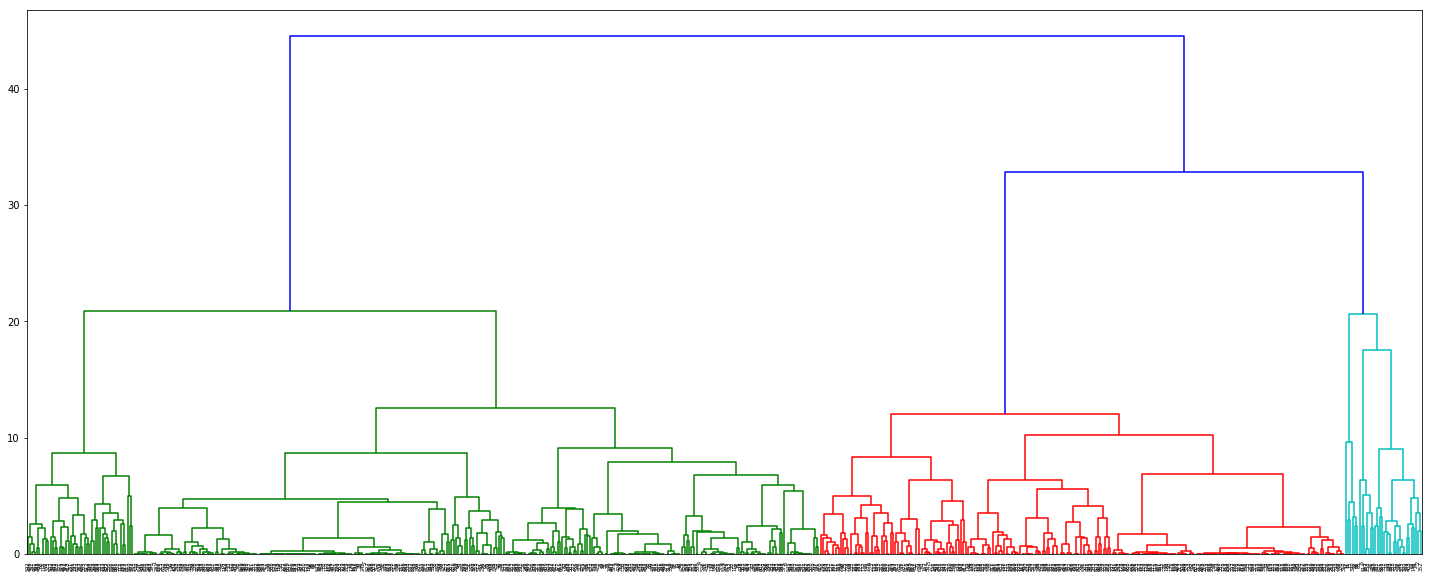

Cluster # 1, count: 1
authorization                 0.000000
authentication                1.000000
credential                    0.000000
ssl                           0.000000
api                           0.000000
utils                         0.000000
Other                         0.000000
Resolution_Done               1.000000
Resolution_Duplicate Issue    0.000000
Resolution_Out of Date_new    0.000000
Resolution_Rejected_new       0.000000
Resolution_Wont Fix_new       0.000000
Priority_ord                  3.000000
norm_ttr                      1.157003
norm_att                     -0.187852
norm_comm                     0.034805
cluster_hier                  1.000000
dtype: float64
Cluster # 2, count: 1
authorization                 0.000000
authentication                1.000000
credential                    0.000000
ssl                           0.000000
api                           0.000000
utils                         0.000000
Other                         0.000000
Resol

dtype: float64
Cluster # 129, count: 1
authorization                   0.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           1.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    2.000000
norm_ttr                       -0.236109
norm_att                       -0.187852
norm_comm                      -0.461350
cluster_hier                  129.000000
dtype: float64
Cluster # 130, count: 1
authorization                   0.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils               

dtype: float64
Cluster # 243, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           0.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    3.000000
norm_ttr                       -0.457333
norm_att                       -0.187852
norm_comm                      -0.461350
cluster_hier                  243.000000
dtype: float64
Cluster # 244, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils               

Cluster # 377, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           0.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    4.000000
norm_ttr                       -0.576913
norm_att                       -0.187852
norm_comm                      -0.461350
cluster_hier                  377.000000
dtype: float64
Cluster # 378, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.0

Cluster # 493, count: 1
authorization                   0.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           1.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    4.000000
norm_ttr                       -0.523102
norm_att                        4.561622
norm_comm                       3.011733
cluster_hier                  493.000000
dtype: float64
Cluster # 494, count: 0
authorization                NaN
authentication               NaN
credential                   NaN
ssl                          NaN
api                          NaN
utils                        NaN
Other                        NaN
Resolutio

In [98]:
hier(clust_data_hier,len(clust_data.index))

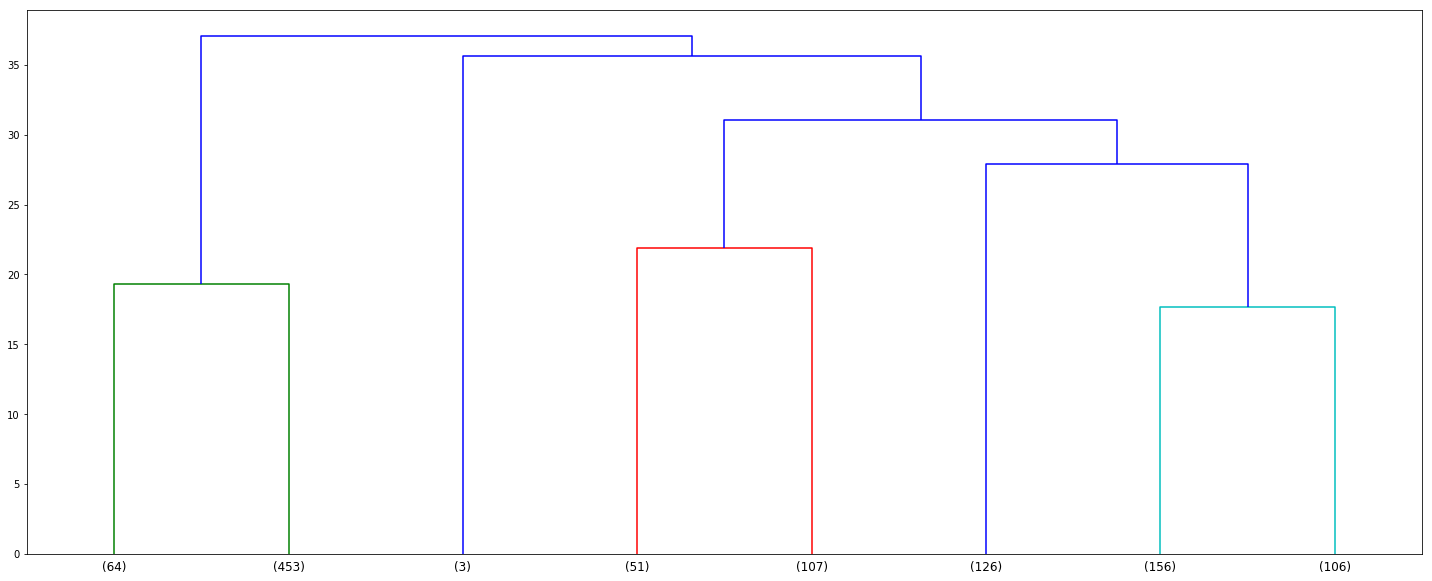

Cluster # 1, count: 64
Builds_lab                    0.218750
Docs_lab                      0.031250
Clustering_lab                0.171875
Config_lab                    0.000000
EJB_lab                       0.093750
Hibernate_lab                 0.031250
IntegrMess_lab                0.000000
Web_lab                       0.062500
Server_lab                    0.140625
Security_lab                  0.078125
Testsuite_lab                 0.031250
Hornet_lab                    0.015625
Maven_lab                     0.078125
Servnet_lab                   0.000000
Other_lab                     0.140625
was_reopened                  0.281250
Resolution_Done               0.937500
Resolution_Duplicate Issue    0.015625
Resolution_Migrated_new       0.031250
Resolution_Rejected           0.015625
Resolution_Wont Fix_new       0.000000
Priority_ord                  4.734375
norm_ttr                     -0.716616
norm_att                     -0.269293
norm_comm                    -0.140009
cl

In [60]:

def hier(data, n_clust):
    Z = linkage(data, 'ward')
    fig = plt.figure(figsize=(25, 10))
    dn = dendrogram(Z,truncate_mode='lastp', p=n_clust)
    plt.show()
    clust_num = fcluster(Z,n_clust,criterion='maxclust')
    data['cluster_hier']=clust_num
    for i in range (1,n_clust+1):
        temp=data[data['cluster_hier']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())
    return 

clust_data_hier=clust_data[['Builds_lab', 'Docs_lab', 'Clustering_lab', 'Config_lab', 'EJB_lab', 'Hibernate_lab', 'IntegrMess_lab', 'Web_lab', 'Server_lab', 'Security_lab', 'Testsuite_lab', 'Hornet_lab', 'Maven_lab', 'Servnet_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Migrated_new','Resolution_Rejected', 'Resolution_Wont Fix_new', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

hier(clust_data_hier,8)

In [32]:
print(clust_data_hier.groupby(['cluster_hier','Priority_ord']).size())
for i in range(len(AOT)):
    print(clust_data_hier.groupby(['cluster_hier',AOT[i]+'_lab']).size())


cluster_hier  Priority_ord
1             4                17
              5                46
2             0                 1
              1                 1
              2                33
              3               399
              4                16
              5                 1
3             0                 1
              2                 2
              3                72
              4                15
              5                 8
4             2                 5
              3                56
              4                 4
              5                 4
5             3                 9
              4                 3
              5                 2
6             2                 9
              3                97
              4                16
              5                11
7             1                 1
              2                42
              3               192
              4                 2
8             3      

In [61]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

def aff_clust(data):
    af = AffinityPropagation(preference=-200, damping=0.9).fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    data['cluster_aff'] = af.labels_

    n_clusters_aff = len(cluster_centers_indices)

    print('Number of clusters: ', n_clusters_aff)   
    
    for i in range (n_clusters_aff):
        print ('---------MEAN VALUES------')
        temp=data[data['cluster_aff']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())
        
        print ('-------CLUSTER CENTERS-----')
        print ('zentroid # '+str(i))
        pos=cluster_centers_indices[i]
        print (data.iloc[pos])
    
    return

clust_data_aff=clust_data[['Builds_lab', 'Docs_lab', 'Clustering_lab', 'Config_lab', 'EJB_lab', 'Hibernate_lab', 'IntegrMess_lab', 'Web_lab', 'Server_lab', 'Security_lab', 'Testsuite_lab', 'Hornet_lab', 'Maven_lab', 'Servnet_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Migrated_new','Resolution_Rejected', 'Resolution_Wont Fix_new', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]
    
    
aff_clust(clust_data_aff)

Number of clusters:  7
---------MEAN VALUES------
Cluster # 0, count: 1
Builds_lab                     0.000000
Docs_lab                       0.000000
Clustering_lab                 0.000000
Config_lab                     0.000000
EJB_lab                        0.000000
Hibernate_lab                  0.000000
IntegrMess_lab                 0.000000
Web_lab                        0.000000
Server_lab                     0.000000
Security_lab                   0.000000
Testsuite_lab                  0.000000
Hornet_lab                     1.000000
Maven_lab                      0.000000
Servnet_lab                    0.000000
Other_lab                      0.000000
was_reopened                   0.000000
Resolution_Done                0.000000
Resolution_Duplicate Issue     0.000000
Resolution_Migrated_new        1.000000
Resolution_Rejected            0.000000
Resolution_Wont Fix_new        0.000000
Priority_ord                   3.000000
norm_ttr                       1.754817
norm_att

In [121]:
print(clust_data_aff.groupby(['cluster_aff','Priority_ord']).size())
for i in range(len(AOT)):
    print(clust_data_aff.groupby(['cluster_aff',AOT[i]+'_lab']).size())

cluster_aff  Priority_ord
0            2                30
             3               255
             4                25
1            2                 2
             3                16
             4                 6
             5                19
2            1                 2
             2                60
             3               218
             4                26
             5                 1
3            2                 9
             3                57
             4                13
             5                 7
4            0                 3
             1                 4
             2                78
             3               336
             4                47
5            4                40
             5               241
6            0                 3
             1                 3
             2                70
             3               143
             4                 7
7            0                 2
             1   

In [98]:
q1=bin_data[(bin_data['Resolution_Duplicate Issue']==1)|(bin_data['Resolution_Out of Date_new']==1)|(bin_data['Resolution_Rejected']==1)|(bin_data["Resolution_Wont Fix_new"]==1)|(bin_data['Resolution_Migrated to another ITS']==1)]
q2=bin_data[bin_data['Resolution_Done']==1]
q3=bin_data[bin_data['Resolution_Out of Date_new']==1]
q4=bin_data[bin_data['Resolution_Rejected']==1]
q5=bin_data[bin_data["Resolution_Wont Fix_new"]==1]
q6=bin_data[bin_data['Resolution_Migrated to another ITS']==1]
q7=bin_data[bin_data['Resolution_Duplicate Issue']==1]
q8=bin_data[bin_data['was_reopened']==1]

633
ttr
Минимум: 0  Максимум: 1354  Среднее: 223.24644549763033
Comments
Минимум: 1  Максимум: 28  Среднее: 3.448657187993681


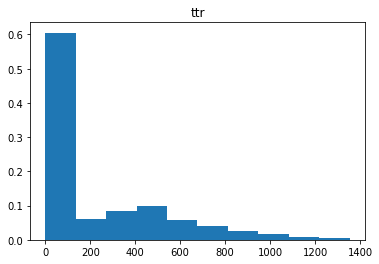

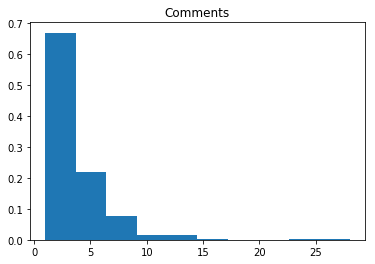

In [106]:
#проблемные баги
print(q1.Issue_key.count())
infa(q1,'ttr')
infa(q1,'Comments')

In [88]:
for i in range(len(AOT)):
    print(q1[[AOT[i]+'_lab']].sum())

Docs_lab    55
dtype: int64
Build_lab    92
dtype: int64
MonitorManage_lab    49
dtype: int64
ESB_lab    177
dtype: int64
EDS_lab    89
dtype: int64
JBPM_lab    43
dtype: int64
JMS_lab    14
dtype: int64
Tools_lab    51
dtype: int64
EAP_lab    19
dtype: int64
jUddi_lab    18
dtype: int64
BPEL_lab    20
dtype: int64
JBossWS_lab    29
dtype: int64
JBRules_lab    12
dtype: int64
Examples_lab    62
dtype: int64
Other_lab    34
dtype: int64


1665
ttr
Минимум: 0  Максимум: 1206  Среднее: 79.12972972972973
Comments
Минимум: 1  Максимум: 34  Среднее: 4.948348348348349


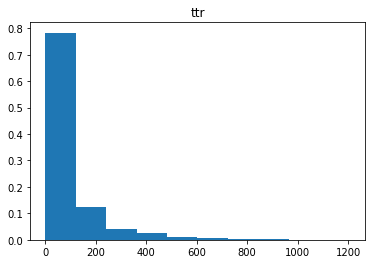

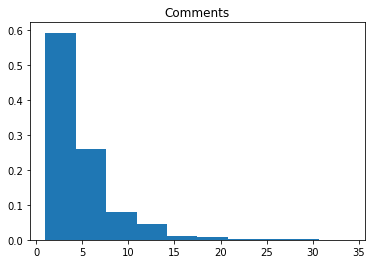

In [107]:
#беспроблемные
print(q2.Issue_key.count())
infa(q2,'ttr')
infa(q2,'Comments')

In [89]:
for i in range(len(AOT)):
    print(q2[[AOT[i]+'_lab']].sum())

Docs_lab    254
dtype: int64
Build_lab    276
dtype: int64
MonitorManage_lab    95
dtype: int64
ESB_lab    464
dtype: int64
EDS_lab    269
dtype: int64
JBPM_lab    126
dtype: int64
JMS_lab    9
dtype: int64
Tools_lab    154
dtype: int64
EAP_lab    44
dtype: int64
jUddi_lab    54
dtype: int64
BPEL_lab    50
dtype: int64
JBossWS_lab    32
dtype: int64
JBRules_lab    43
dtype: int64
Examples_lab    123
dtype: int64
Other_lab    47
dtype: int64


140
ttr
Минимум: 0  Максимум: 1239  Среднее: 514.2071428571429
Comments
Минимум: 1  Максимум: 15  Среднее: 3.0785714285714287


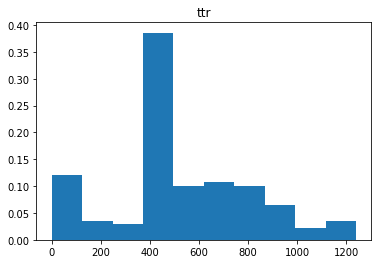

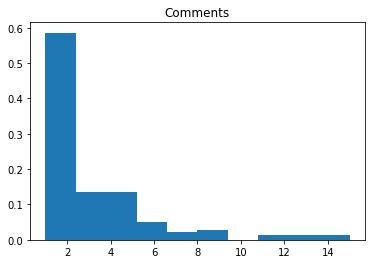

In [108]:
#устаревшие
print(q3.Issue_key.count())
infa(q3,'ttr')
infa(q3,'Comments')

In [114]:
for i in range(len(AOT)):
    print(q3[[AOT[i]+'_lab']].sum())


Docs_lab    19
dtype: int64
Build_lab    25
dtype: int64
MonitorManage_lab    5
dtype: int64
ESB_lab    45
dtype: int64
EDS_lab    9
dtype: int64
JBPM_lab    8
dtype: int64
JMS_lab    3
dtype: int64
Tools_lab    11
dtype: int64
EAP_lab    10
dtype: int64
jUddi_lab    7
dtype: int64
BPEL_lab    1
dtype: int64
JBossWS_lab    7
dtype: int64
JBRules_lab    2
dtype: int64
Examples_lab    24
dtype: int64
Other_lab    5
dtype: int64


148
ttr
Минимум: 0  Максимум: 444  Среднее: 32.41891891891892
Comments
Минимум: 1  Максимум: 11  Среднее: 3.4864864864864864


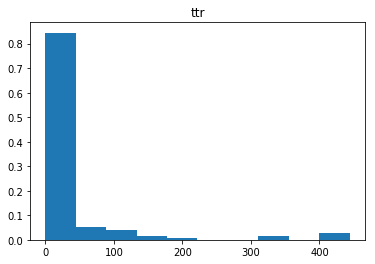

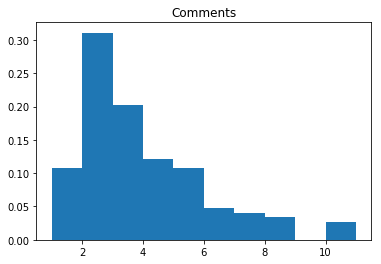

In [109]:
#отклоненные
print(q4.Issue_key.count())
infa(q4,'ttr')
infa(q4,'Comments')

In [92]:
for i in range(len(AOT)):
    print(q4[[AOT[i]+'_lab']].sum())

Docs_lab    10
dtype: int64
Build_lab    25
dtype: int64
MonitorManage_lab    9
dtype: int64
ESB_lab    44
dtype: int64
EDS_lab    32
dtype: int64
JBPM_lab    8
dtype: int64
JMS_lab    5
dtype: int64
Tools_lab    7
dtype: int64
EAP_lab    1
dtype: int64
jUddi_lab    3
dtype: int64
BPEL_lab    7
dtype: int64
JBossWS_lab    8
dtype: int64
JBRules_lab    3
dtype: int64
Examples_lab    8
dtype: int64
Other_lab    7
dtype: int64


140
ttr
Минимум: 0  Максимум: 962  Среднее: 233.2
Comments
Минимум: 1  Максимум: 25  Среднее: 4.2785714285714285


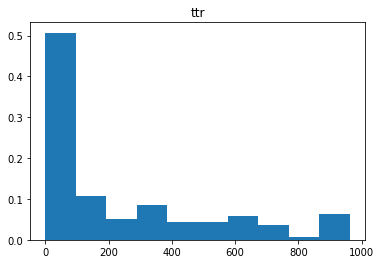

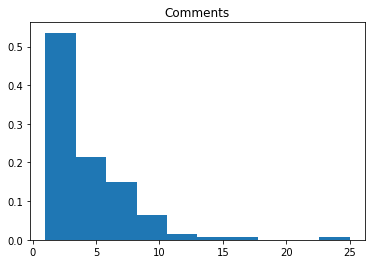

In [110]:
#Wont Fix
print(q5.Issue_key.count())
infa(q5,'ttr')
infa(q5,'Comments')

In [115]:
for i in range(len(AOT)):
    print(q5[[AOT[i]+'_lab']].sum())

Docs_lab    7
dtype: int64
Build_lab    17
dtype: int64
MonitorManage_lab    22
dtype: int64
ESB_lab    34
dtype: int64
EDS_lab    24
dtype: int64
JBPM_lab    12
dtype: int64
JMS_lab    2
dtype: int64
Tools_lab    15
dtype: int64
EAP_lab    3
dtype: int64
jUddi_lab    1
dtype: int64
BPEL_lab    3
dtype: int64
JBossWS_lab    2
dtype: int64
JBRules_lab    6
dtype: int64
Examples_lab    13
dtype: int64
Other_lab    7
dtype: int64


126
ttr
Минимум: 0  Максимум: 1354  Среднее: 238.515873015873
Comments
Минимум: 1  Максимум: 28  Среднее: 3.2222222222222223


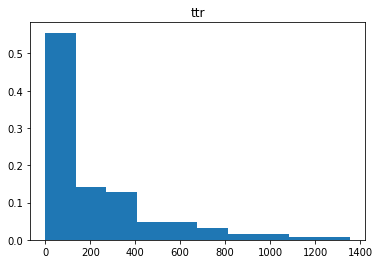

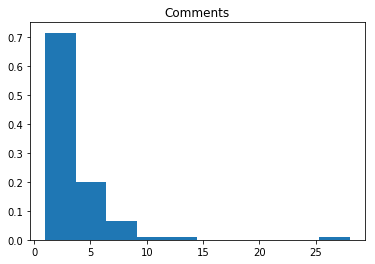

In [111]:
#migration
print(q6.Issue_key.count())
infa(q6,'ttr')
infa(q6,'Comments')

79
ttr
Минимум: 0  Максимум: 383  Среднее: 23.126582278481013
Comments
Минимум: 1  Максимум: 13  Среднее: 2.9240506329113924


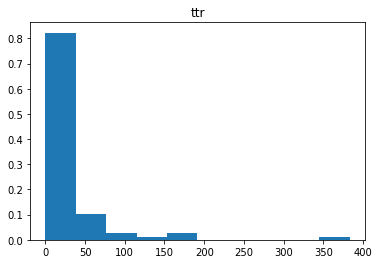

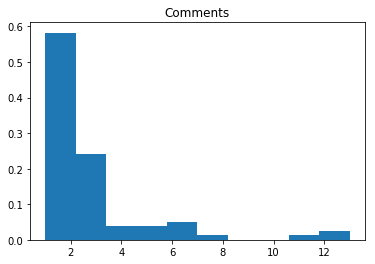

In [112]:
#дубликаты
print(q7.Issue_key.count())
infa(q7,'ttr')
infa(q7,'Comments')

510
ttr
Минимум: 0  Максимум: 1354  Среднее: 168.19607843137254
Comments
Минимум: 1  Максимум: 34  Среднее: 7.031372549019608


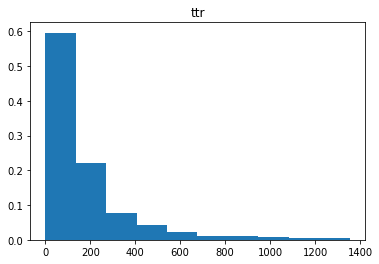

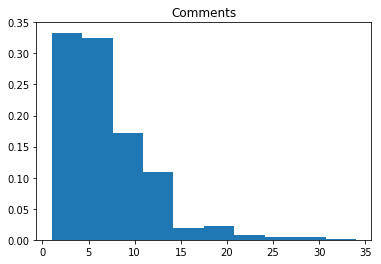

In [113]:
# reopened
print(q8.Issue_key.count())
infa(q8,'ttr')
infa(q8,'Comments')

In [116]:
for i in range(len(AOT)):
    print(q8[[AOT[i]+'_lab']].sum())

Docs_lab    79
dtype: int64
Build_lab    99
dtype: int64
MonitorManage_lab    42
dtype: int64
ESB_lab    148
dtype: int64
EDS_lab    47
dtype: int64
JBPM_lab    49
dtype: int64
JMS_lab    7
dtype: int64
Tools_lab    43
dtype: int64
EAP_lab    13
dtype: int64
jUddi_lab    17
dtype: int64
BPEL_lab    27
dtype: int64
JBossWS_lab    10
dtype: int64
JBRules_lab    15
dtype: int64
Examples_lab    41
dtype: int64
Other_lab    11
dtype: int64
